In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [ ]:

print("=" * 80)
print("ANÁLISIS EXPLORATORIO DE DATOS - AIRBNB MÉXICO")
print("=" * 80)

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

print(f"\n✓ Datasets cargados exitosamente")
print(f"  • Listings: {listings.shape[0]:,} registros x {listings.shape[1]} columnas")
print(f"  • Calendar: {calendar.shape[0]:,} registros x {calendar.shape[1]} columnas")
print(f"  • Reviews: {reviews.shape[0]:,} registros x {reviews.shape[1]} columnas")

ANÁLISIS EXPLORATORIO DE DATOS - AIRBNB MÉXICO

✓ Datasets cargados exitosamente
  • Listings: 26,401 registros x 79 columnas
  • Calendar: 9,636,365 registros x 7 columnas
  • Reviews: 1,388,226 registros x 6 columnas



 ANÁLISIS DE CALIDAD DE DATOS


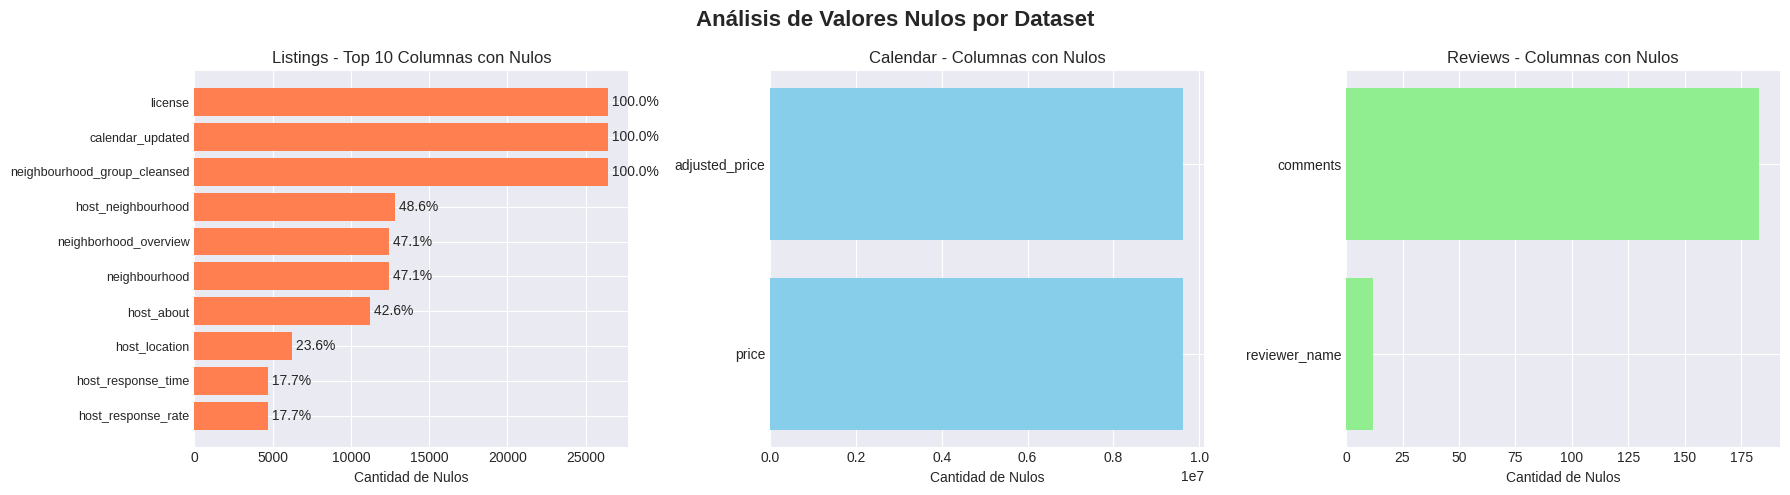


 Interpretación - Valores Nulos:
  • Listings: 43 columnas con valores nulos
  • Calendar: 2 columnas con valores nulos
  • Reviews: 2 columnas con valores nulos
    Acción requerida: Definir estrategia de imputación para campos críticos


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 80)

# 2.1 Valores Nulos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Valores Nulos por Dataset', fontsize=16, fontweight='bold')

# Listings
nulos_listings = listings.isnull().sum()
nulos_listings_pct = (nulos_listings / len(listings) * 100).round(2)
top_nulos_listings = nulos_listings[nulos_listings > 0].sort_values(ascending=False).head(10)

if len(top_nulos_listings) > 0:
    axes[0].barh(range(len(top_nulos_listings)), top_nulos_listings.values, color='coral')
    axes[0].set_yticks(range(len(top_nulos_listings)))
    axes[0].set_yticklabels(top_nulos_listings.index, fontsize=9)
    axes[0].set_xlabel('Cantidad de Nulos')
    axes[0].set_title('Listings - Top 10 Columnas con Nulos')
    axes[0].invert_yaxis()

    # Agregar porcentajes
    for i, v in enumerate(top_nulos_listings.values):
        pct = (v / len(listings) * 100)
        axes[0].text(v, i, f' {pct:.1f}%', va='center')

# Calendar
nulos_calendar = calendar.isnull().sum()
if nulos_calendar.sum() > 0:
    top_nulos_calendar = nulos_calendar[nulos_calendar > 0].sort_values(ascending=False)
    axes[1].barh(range(len(top_nulos_calendar)), top_nulos_calendar.values, color='skyblue')
    axes[1].set_yticks(range(len(top_nulos_calendar)))
    axes[1].set_yticklabels(top_nulos_calendar.index)
    axes[1].set_xlabel('Cantidad de Nulos')
    axes[1].set_title('Calendar - Columnas con Nulos')
else:
    axes[1].text(0.5, 0.5, 'Sin valores nulos', ha='center', va='center', fontsize=14)
    axes[1].set_title('Calendar - Sin Nulos')
    axes[1].axis('off')

# Reviews
nulos_reviews = reviews.isnull().sum()
top_nulos_reviews = nulos_reviews[nulos_reviews > 0].sort_values(ascending=False).head(10)

if len(top_nulos_reviews) > 0:
    axes[2].barh(range(len(top_nulos_reviews)), top_nulos_reviews.values, color='lightgreen')
    axes[2].set_yticks(range(len(top_nulos_reviews)))
    axes[2].set_yticklabels(top_nulos_reviews.index)
    axes[2].set_xlabel('Cantidad de Nulos')
    axes[2].set_title('Reviews - Columnas con Nulos')
    axes[2].invert_yaxis()

plt.tight_layout()
plt.savefig('01_valores_nulos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Interpretación - Valores Nulos:")
print(f"  • Listings: {(nulos_listings > 0).sum()} columnas con valores nulos")
print(f"  • Calendar: {(nulos_calendar > 0).sum()} columnas con valores nulos")
print(f"  • Reviews: {(nulos_reviews > 0).sum()} columnas con valores nulos")
print(f"    Acción requerida: Definir estrategia de imputación para campos críticos")

 3. ANÁLISIS DE PRECIOS - LISTINGS



 ANÁLISIS DE PRECIOS


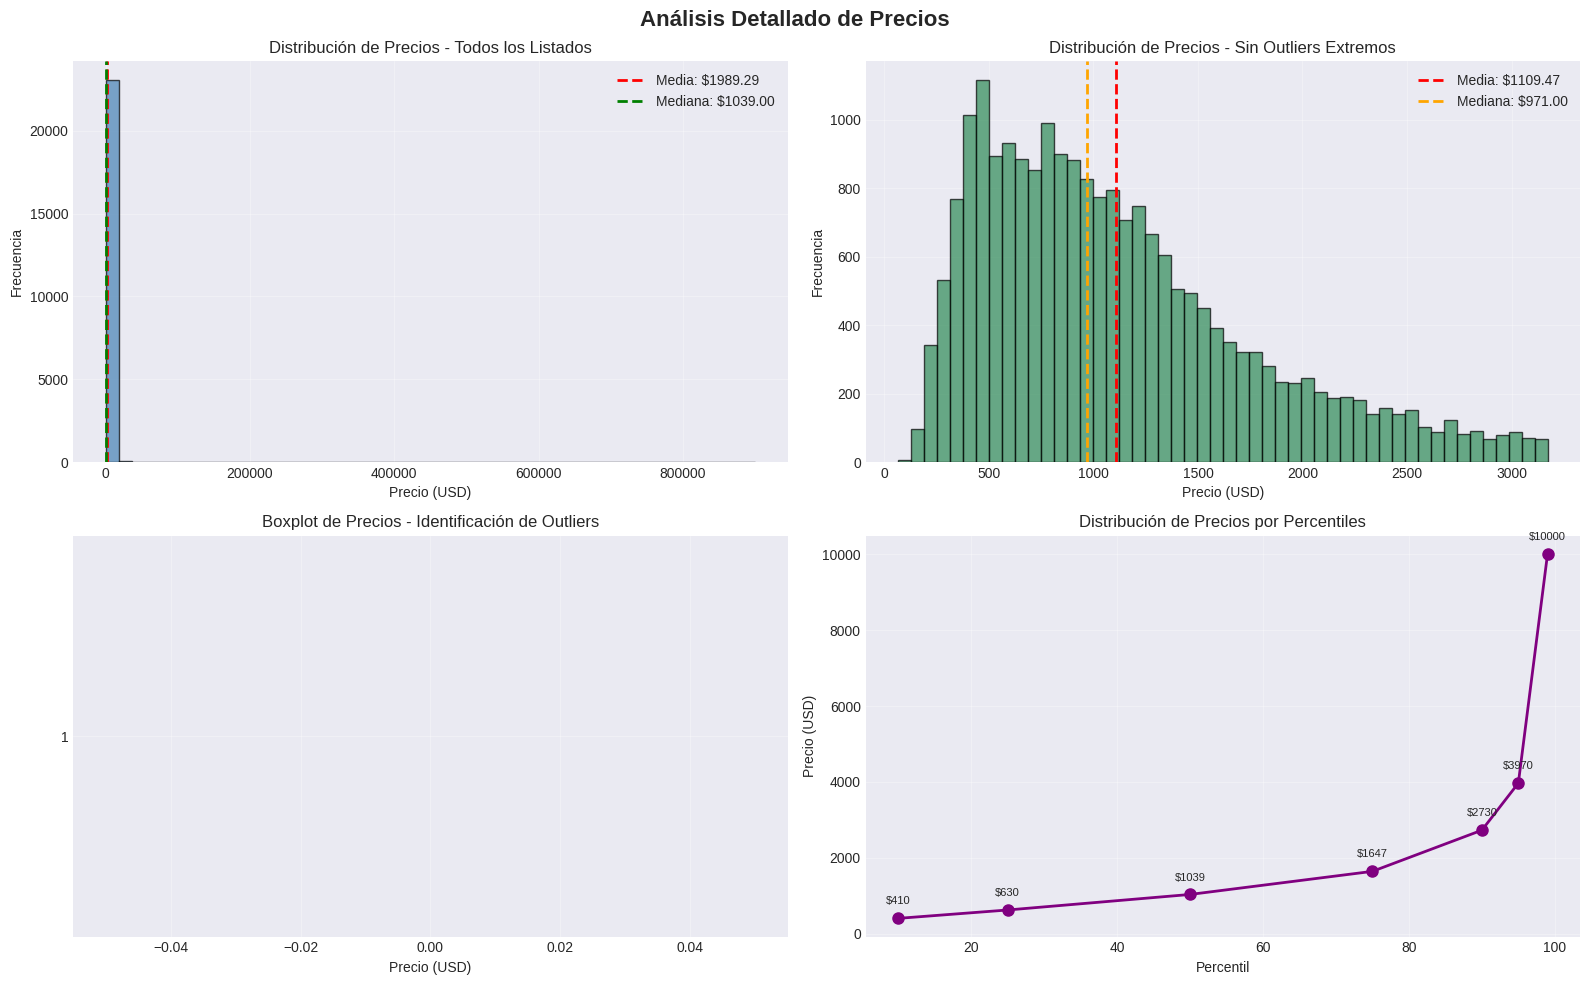


 Estadísticas de Precios:
  • Promedio: $1989.29
  • Mediana: $1039.00
  • Mínimo: $66.00
  • Máximo: $900000.00
  • Desviación estándar: $18500.68
  • Outliers detectados (>Q3+1.5*IQR): 1752

 Interpretación:
  • La mediana ($1039.00) es menor que la media, indicando sesgo positivo (precios altos)
  • El 50% central de los precios está entre $630.00 y $1647.00
  • Presencia de outliers extremos que podrían requerir análisis especial


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE PRECIOS")
print("=" * 80)

# Limpiar precios
if 'price' in listings.columns:
    listings['price_clean'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análisis Detallado de Precios', fontsize=16, fontweight='bold')

    # Distribución general
    axes[0, 0].hist(listings['price_clean'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(listings['price_clean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${listings["price_clean"].mean():.2f}')
    axes[0, 0].axvline(listings['price_clean'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${listings["price_clean"].median():.2f}')
    axes[0, 0].set_xlabel('Precio (USD)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].set_title('Distribución de Precios - Todos los Listados')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Distribución filtrada (sin outliers extremos)
    q1 = listings['price_clean'].quantile(0.25)
    q3 = listings['price_clean'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    prices_filtered = listings[(listings['price_clean'] >= lower_bound) & (listings['price_clean'] <= upper_bound)]['price_clean']

    axes[0, 1].hist(prices_filtered, bins=50, color='seagreen', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(prices_filtered.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${prices_filtered.mean():.2f}')
    axes[0, 1].axvline(prices_filtered.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: ${prices_filtered.median():.2f}')
    axes[0, 1].set_xlabel('Precio (USD)')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].set_title('Distribución de Precios - Sin Outliers Extremos')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

    # Boxplot
    axes[1, 0].boxplot([listings['price_clean']], vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
    axes[1, 0].set_xlabel('Precio (USD)')
    axes[1, 0].set_title('Boxplot de Precios - Identificación de Outliers')
    axes[1, 0].grid(alpha=0.3)

    # Estadísticas por percentiles
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    prices_percentiles = [listings['price_clean'].quantile(p/100) for p in percentiles]
    axes[1, 1].plot(percentiles, prices_percentiles, marker='o', linewidth=2, markersize=8, color='purple')
    axes[1, 1].set_xlabel('Percentil')
    axes[1, 1].set_ylabel('Precio (USD)')
    axes[1, 1].set_title('Distribución de Precios por Percentiles')
    axes[1, 1].grid(alpha=0.3)

    for p, price in zip(percentiles, prices_percentiles):
        axes[1, 1].annotate(f'${price:.0f}', (p, price), textcoords="offset points",
                           xytext=(0,10), ha='center', fontsize=8)

    plt.tight_layout()
    plt.savefig('02_analisis_precios.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n Estadísticas de Precios:")
    print(f"  • Promedio: ${listings['price_clean'].mean():.2f}")
    print(f"  • Mediana: ${listings['price_clean'].median():.2f}")
    print(f"  • Mínimo: ${listings['price_clean'].min():.2f}")
    print(f"  • Máximo: ${listings['price_clean'].max():.2f}")
    print(f"  • Desviación estándar: ${listings['price_clean'].std():.2f}")
    print(f"  • Outliers detectados (>Q3+1.5*IQR): {(listings['price_clean'] > upper_bound).sum()}")

    print(f"\n Interpretación:")
    print(f"  • La mediana (${listings['price_clean'].median():.2f}) es {'menor' if listings['price_clean'].median() < listings['price_clean'].mean() else 'mayor'} que la media, indicando sesgo {'positivo (precios altos)' if listings['price_clean'].median() < listings['price_clean'].mean() else 'negativo'}")
    print(f"  • El 50% central de los precios está entre ${q1:.2f} y ${q3:.2f}")
    print(f"  • Presencia de outliers extremos que podrían requerir análisis especial")

4. ANÁLISIS DE TIPO DE PROPIEDAD Y TIPO DE HABITACIÓN




 ANÁLISIS DE TIPOS DE PROPIEDAD Y HABITACIÓN


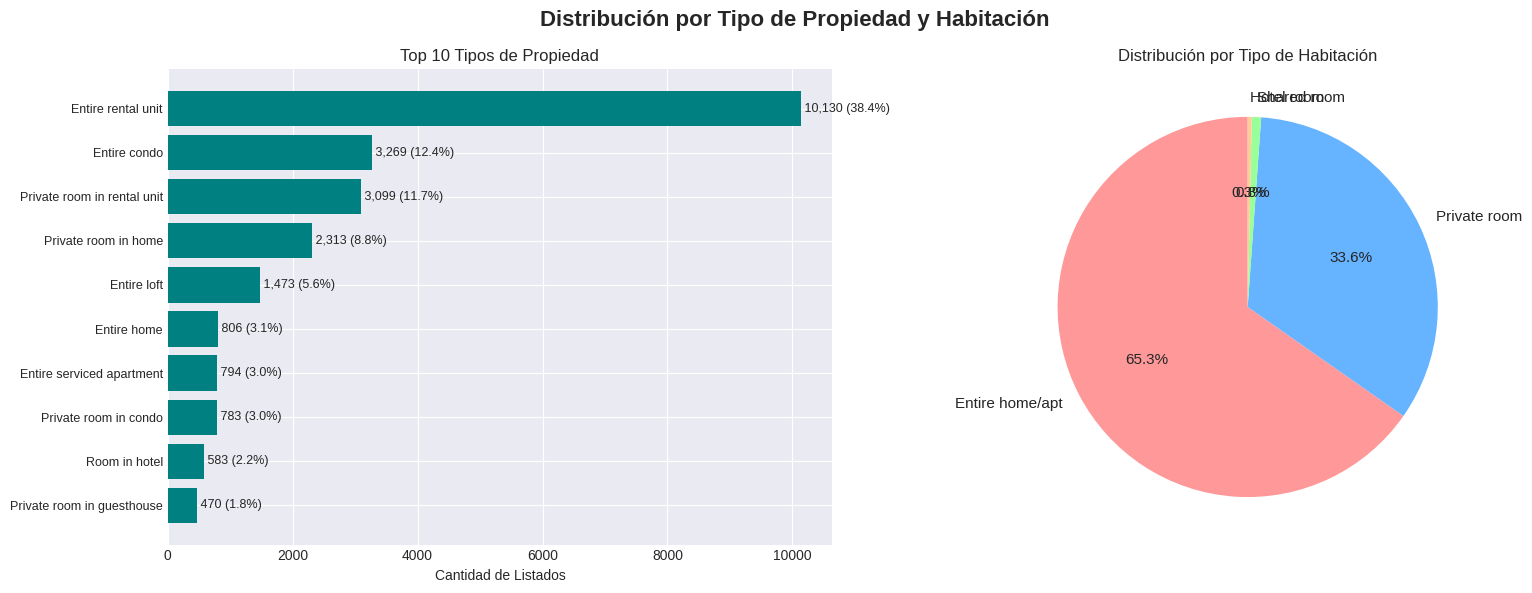


 Top 3 Tipos de Propiedad:
  1. Entire rental unit: 10,130 (38.4%)
  2. Entire condo: 3,269 (12.4%)
  3. Private room in rental unit: 3,099 (11.7%)

 Distribución de Tipo de Habitación:
  • Entire home/apt: 17,235 (65.3%)
  • Private room: 8,867 (33.6%)
  • Shared room: 208 (0.8%)
  • Hotel room: 91 (0.3%)


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE TIPOS DE PROPIEDAD Y HABITACIÓN")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución por Tipo de Propiedad y Habitación', fontsize=16, fontweight='bold')

# Tipo de propiedad
if 'property_type' in listings.columns:
    property_counts = listings['property_type'].value_counts().head(10)
    axes[0].barh(range(len(property_counts)), property_counts.values, color='teal')
    axes[0].set_yticks(range(len(property_counts)))
    axes[0].set_yticklabels(property_counts.index, fontsize=9)
    axes[0].set_xlabel('Cantidad de Listados')
    axes[0].set_title('Top 10 Tipos de Propiedad')
    axes[0].invert_yaxis()

    for i, v in enumerate(property_counts.values):
        pct = (v / len(listings) * 100)
        axes[0].text(v, i, f' {v:,} ({pct:.1f}%)', va='center', fontsize=9)

# Tipo de habitación
if 'room_type' in listings.columns:
    room_counts = listings['room_type'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    axes[1].pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%',
                startangle=90, colors=colors, textprops={'fontsize': 11})
    axes[1].set_title('Distribución por Tipo de Habitación')

plt.tight_layout()
plt.savefig('03_tipos_propiedad.png', dpi=300, bbox_inches='tight')
plt.show()

if 'property_type' in listings.columns:
    print(f"\n Top 3 Tipos de Propiedad:")
    for i, (prop, count) in enumerate(property_counts.head(3).items(), 1):
        print(f"  {i}. {prop}: {count:,} ({count/len(listings)*100:.1f}%)")

if 'room_type' in listings.columns:
    print(f"\n Distribución de Tipo de Habitación:")
    for room, count in room_counts.items():
        print(f"  • {room}: {count:,} ({count/len(listings)*100:.1f}%)")

5. ANÁLISIS GEOGRÁFICO


ANÁLISIS GEOGRÁFICO


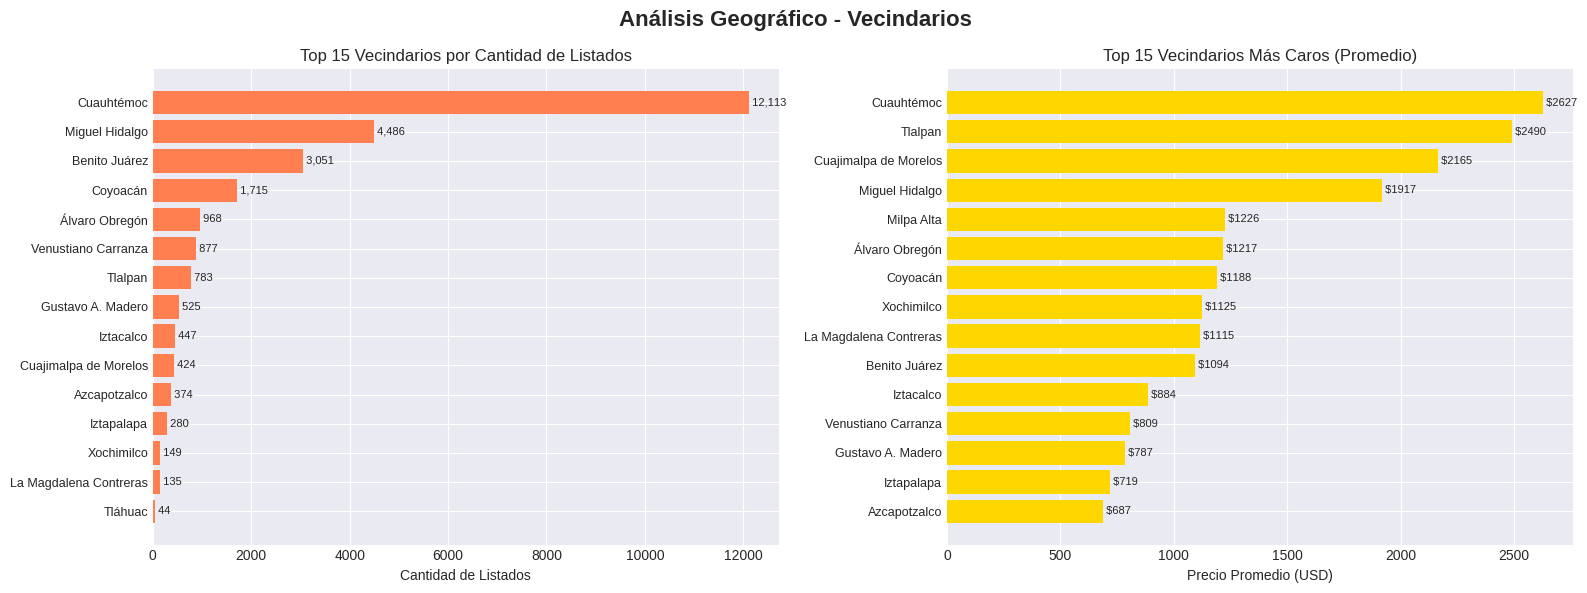


 Top 5 Vecindarios por Cantidad:
  1. Cuauhtémoc: 12,113 listados
  2. Miguel Hidalgo: 4,486 listados
  3. Benito Juárez: 3,051 listados
  4. Coyoacán: 1,715 listados
  5. Álvaro Obregón: 968 listados

 Top 5 Vecindarios Más Caros (Promedio):
  1. Cuauhtémoc: $2626.81
  2. Tlalpan: $2489.84
  3. Cuajimalpa de Morelos: $2165.02
  4. Miguel Hidalgo: $1917.26
  5. Milpa Alta: $1225.91


In [ ]:
print("\n" + "=" * 80)
print("ANÁLISIS GEOGRÁFICO")
print("=" * 80)

if 'neighbourhood' in listings.columns or 'neighbourhood_cleansed' in listings.columns:
    neighbourhood_col = 'neighbourhood_cleansed' if 'neighbourhood_cleansed' in listings.columns else 'neighbourhood'

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Análisis Geográfico - Vecindarios', fontsize=16, fontweight='bold')

    # Top vecindarios por cantidad
    top_neighbourhoods = listings[neighbourhood_col].value_counts().head(15)
    axes[0].barh(range(len(top_neighbourhoods)), top_neighbourhoods.values, color='coral')
    axes[0].set_yticks(range(len(top_neighbourhoods)))
    axes[0].set_yticklabels(top_neighbourhoods.index, fontsize=9)
    axes[0].set_xlabel('Cantidad de Listados')
    axes[0].set_title('Top 15 Vecindarios por Cantidad de Listados')
    axes[0].invert_yaxis()

    for i, v in enumerate(top_neighbourhoods.values):
        axes[0].text(v, i, f' {v:,}', va='center', fontsize=8)

    # Precio promedio por vecindario (top 15)
    if 'price_clean' in listings.columns:
        avg_price_neighbourhood = listings.groupby(neighbourhood_col)['price_clean'].mean().sort_values(ascending=False).head(15)
        axes[1].barh(range(len(avg_price_neighbourhood)), avg_price_neighbourhood.values, color='gold')
        axes[1].set_yticks(range(len(avg_price_neighbourhood)))
        axes[1].set_yticklabels(avg_price_neighbourhood.index, fontsize=9)
        axes[1].set_xlabel('Precio Promedio (USD)')
        axes[1].set_title('Top 15 Vecindarios Más Caros (Promedio)')
        axes[1].invert_yaxis()

        for i, v in enumerate(avg_price_neighbourhood.values):
            axes[1].text(v, i, f' ${v:.0f}', va='center', fontsize=8)

    plt.tight_layout()
    plt.savefig('04_analisis_geografico.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n Top 5 Vecindarios por Cantidad:")
    for i, (neigh, count) in enumerate(top_neighbourhoods.head(5).items(), 1):
        print(f"  {i}. {neigh}: {count:,} listados")

    if 'price_clean' in listings.columns:
        print(f"\n Top 5 Vecindarios Más Caros (Promedio):")
        for i, (neigh, price) in enumerate(avg_price_neighbourhood.head(5).items(), 1):
            print(f"  {i}. {neigh}: ${price:.2f}")

6. ANÁLISIS DE REVIEWS


 ANÁLISIS DE REVIEWS


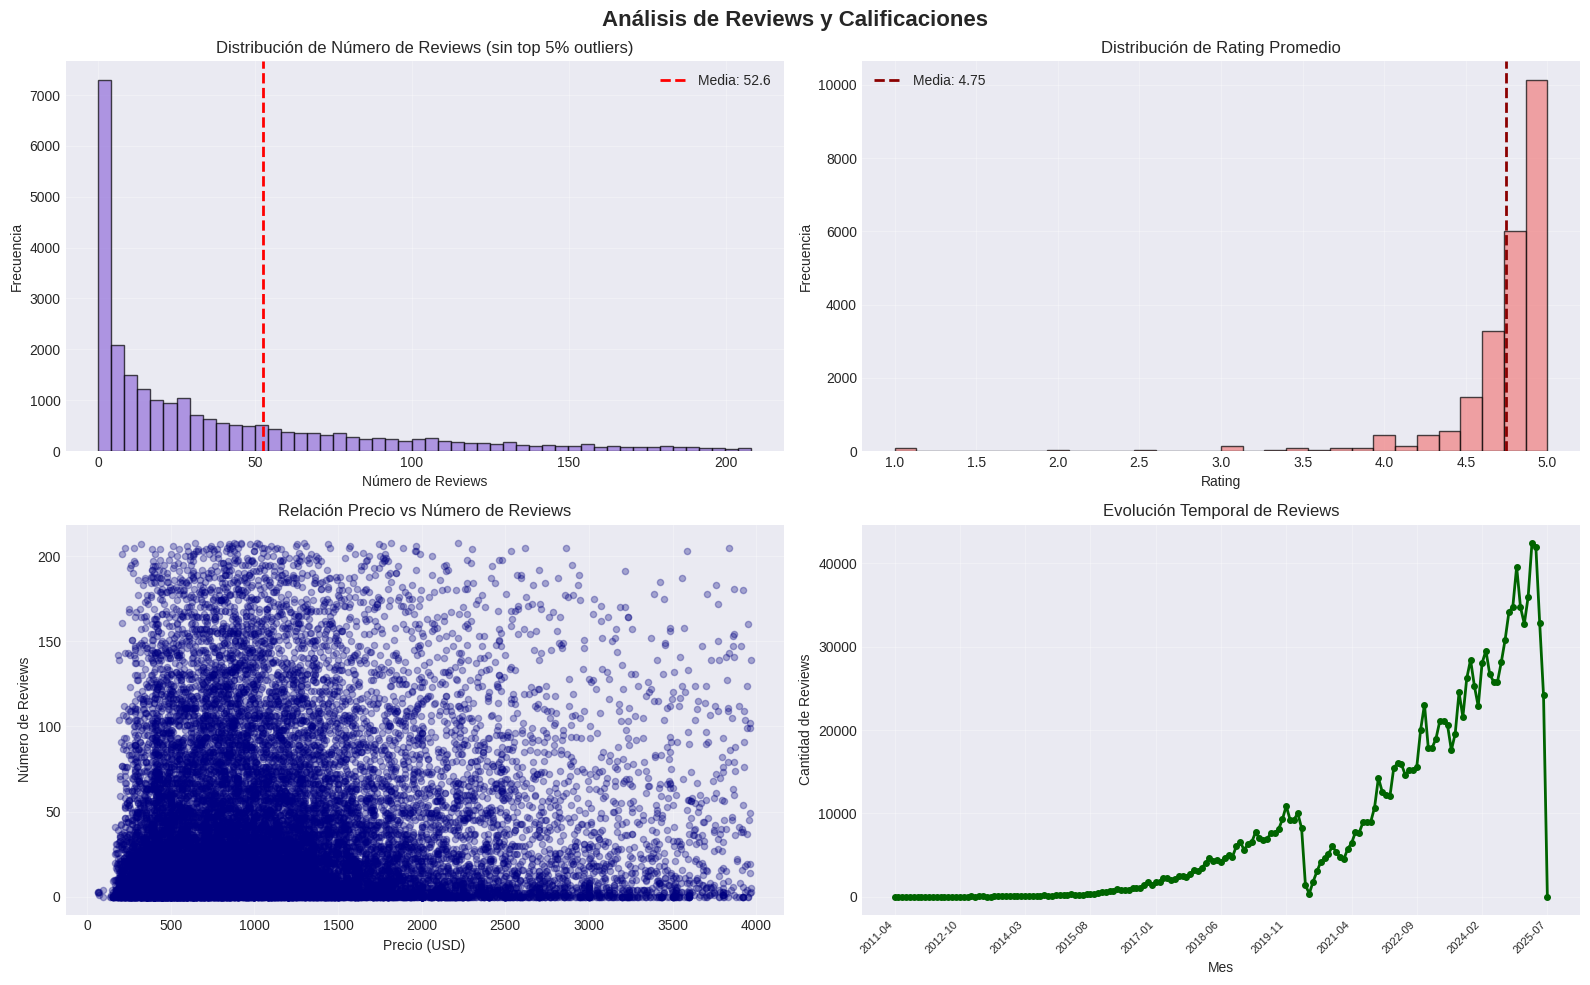


 Estadísticas de Reviews:
  • Promedio de reviews por listado: 52.6
  • Mediana: 21
  • Listados sin reviews: 3,373 (12.8%)

 Estadísticas de Rating:
  • Rating promedio: 4.75/100
  • Rating mediano: 4.84/100
  • Listados con rating ≥ 90: 0 (0.0%)


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE REVIEWS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis de Reviews y Calificaciones', fontsize=16, fontweight='bold')

# Distribución de número de reviews
if 'number_of_reviews' in listings.columns:
    reviews_filtered = listings[listings['number_of_reviews'] < listings['number_of_reviews'].quantile(0.95)]
    axes[0, 0].hist(reviews_filtered['number_of_reviews'], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(listings['number_of_reviews'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {listings["number_of_reviews"].mean():.1f}')
    axes[0, 0].set_xlabel('Número de Reviews')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].set_title('Distribución de Número de Reviews (sin top 5% outliers)')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

# Rating promedio
if 'review_scores_rating' in listings.columns:
    ratings = listings['review_scores_rating'].dropna()
    axes[0, 1].hist(ratings, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(ratings.mean(), color='darkred', linestyle='--', linewidth=2, label=f'Media: {ratings.mean():.2f}')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].set_title('Distribución de Rating Promedio')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# Relación precio vs número de reviews
if 'price_clean' in listings.columns and 'number_of_reviews' in listings.columns:
    sample = listings[(listings['price_clean'] < listings['price_clean'].quantile(0.95)) &
                     (listings['number_of_reviews'] < listings['number_of_reviews'].quantile(0.95))]
    axes[1, 0].scatter(sample['price_clean'], sample['number_of_reviews'], alpha=0.3, s=20, color='navy')
    axes[1, 0].set_xlabel('Precio (USD)')
    axes[1, 0].set_ylabel('Número de Reviews')
    axes[1, 0].set_title('Relación Precio vs Número de Reviews')
    axes[1, 0].grid(alpha=0.3)

# Reviews en el tiempo
if 'date' in reviews.columns:
    reviews['date'] = pd.to_datetime(reviews['date'])
    reviews_monthly = reviews.groupby(reviews['date'].dt.to_period('M')).size()
    axes[1, 1].plot(reviews_monthly.index.astype(str), reviews_monthly.values, linewidth=2, color='darkgreen', marker='o', markersize=4)
    axes[1, 1].set_xlabel('Mes')
    axes[1, 1].set_ylabel('Cantidad de Reviews')
    axes[1, 1].set_title('Evolución Temporal de Reviews')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(alpha=0.3)

    # Mostrar solo algunos labels
    step = max(len(reviews_monthly) // 10, 1)
    axes[1, 1].set_xticks(range(0, len(reviews_monthly), step))
    axes[1, 1].set_xticklabels(reviews_monthly.index.astype(str)[::step], rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.savefig('05_analisis_reviews.png', dpi=300, bbox_inches='tight')
plt.show()

if 'number_of_reviews' in listings.columns:
    print(f"\n Estadísticas de Reviews:")
    print(f"  • Promedio de reviews por listado: {listings['number_of_reviews'].mean():.1f}")
    print(f"  • Mediana: {listings['number_of_reviews'].median():.0f}")
    print(f"  • Listados sin reviews: {(listings['number_of_reviews'] == 0).sum():,} ({(listings['number_of_reviews'] == 0).sum()/len(listings)*100:.1f}%)")

if 'review_scores_rating' in listings.columns:
    print(f"\n Estadísticas de Rating:")
    print(f"  • Rating promedio: {ratings.mean():.2f}/100")
    print(f"  • Rating mediano: {ratings.median():.2f}/100")
    print(f"  • Listados con rating ≥ 90: {(ratings >= 90).sum():,} ({(ratings >= 90).sum()/len(ratings)*100:.1f}%)")

7. ANÁLISIS DE DISPONIBILIDAD (CALENDAR)


 ANÁLISIS DE DISPONIBILIDAD


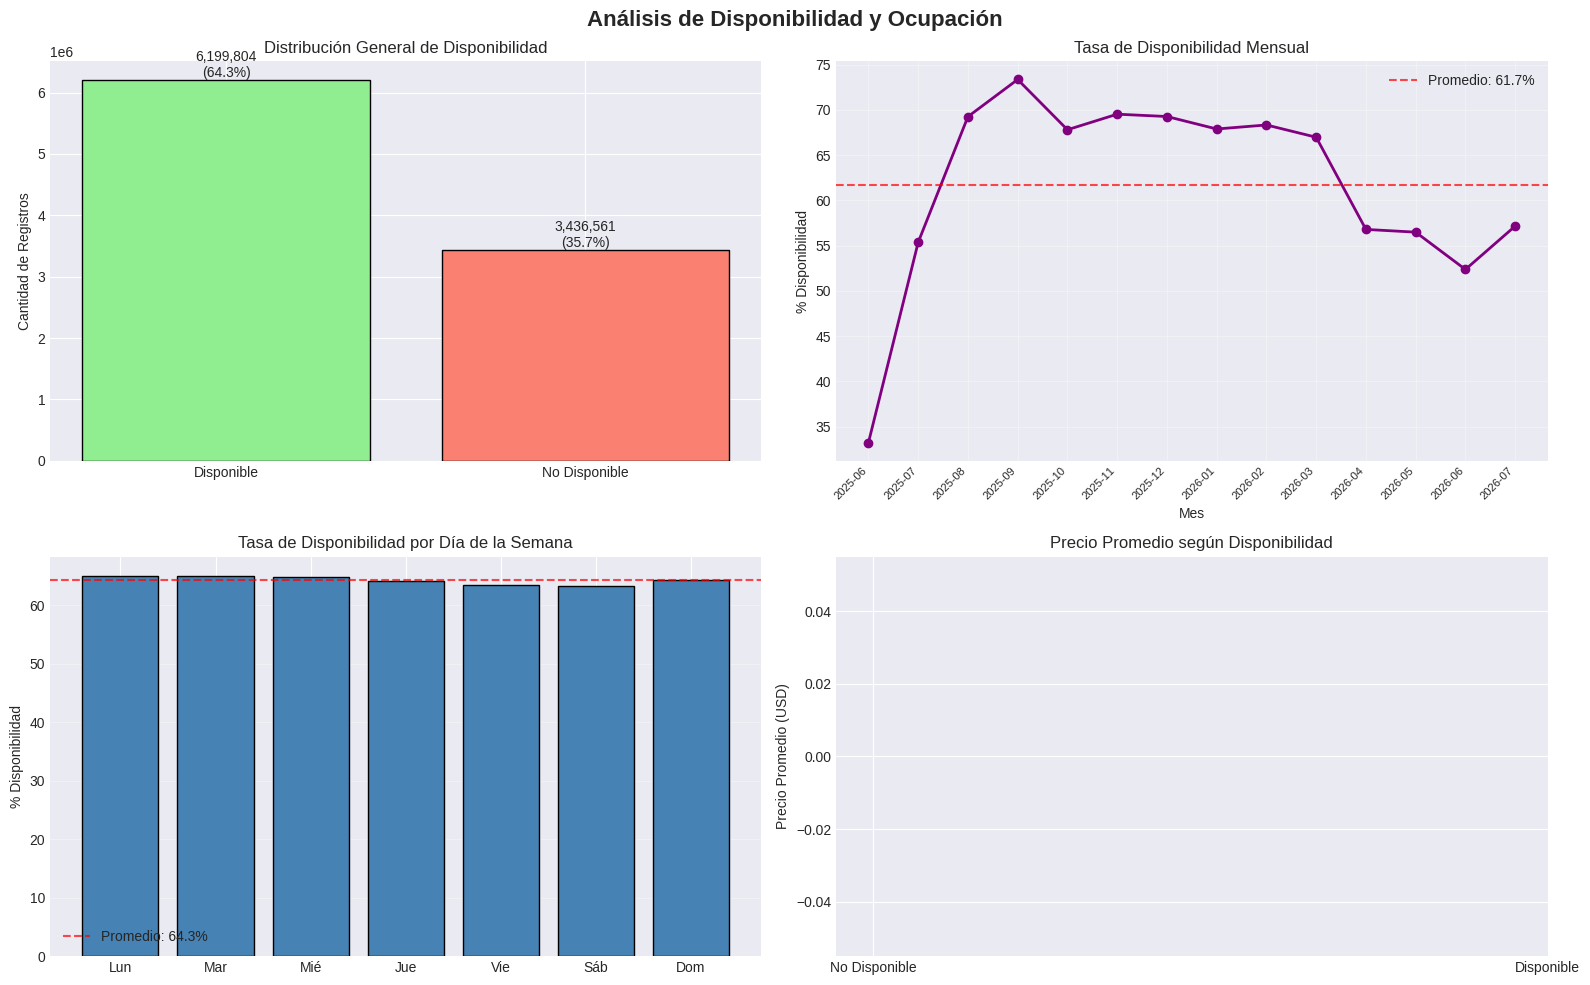


 Estadísticas de Disponibilidad:
  • Porcentaje general disponible: 64.3%
  • Porcentaje general ocupado: 35.7%
  • Día con mayor disponibilidad: Monday (65.1%)
  • Día con menor disponibilidad: Saturday (63.4%)

 Interpretación:
  • Alta disponibilidad general (64.3%) sugiere oferta abundante


In [ ]:

print("\n" + "=" * 80)
print(" ANÁLISIS DE DISPONIBILIDAD")
print("=" * 80)

if 'date' in calendar.columns and 'available' in calendar.columns:
    calendar['date'] = pd.to_datetime(calendar['date'])
    calendar['month'] = calendar['date'].dt.to_period('M')
    calendar['day_of_week'] = calendar['date'].dt.day_name()

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análisis de Disponibilidad y Ocupación', fontsize=16, fontweight='bold')

    # Disponibilidad general
    avail_counts = calendar['available'].value_counts()
    colors_avail = ['lightgreen' if x == 't' else 'salmon' for x in avail_counts.index]
    axes[0, 0].bar(range(len(avail_counts)), avail_counts.values, color=colors_avail, edgecolor='black')
    axes[0, 0].set_xticks(range(len(avail_counts)))
    axes[0, 0].set_xticklabels(['Disponible' if x == 't' else 'No Disponible' for x in avail_counts.index])
    axes[0, 0].set_ylabel('Cantidad de Registros')
    axes[0, 0].set_title('Distribución General de Disponibilidad')

    for i, v in enumerate(avail_counts.values):
        pct = v / len(calendar) * 100
        axes[0, 0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom')

    # Disponibilidad por mes
    monthly_avail = calendar.groupby('month')['available'].apply(lambda x: (x == 't').sum() / len(x) * 100)
    axes[0, 1].plot(monthly_avail.index.astype(str), monthly_avail.values, linewidth=2, marker='o', color='purple', markersize=6)
    axes[0, 1].set_xlabel('Mes')
    axes[0, 1].set_ylabel('% Disponibilidad')
    axes[0, 1].set_title('Tasa de Disponibilidad Mensual')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(alpha=0.3)
    axes[0, 1].axhline(monthly_avail.mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio: {monthly_avail.mean():.1f}%')
    axes[0, 1].legend()

    step = max(len(monthly_avail) // 10, 1)
    axes[0, 1].set_xticks(range(0, len(monthly_avail), step))
    axes[0, 1].set_xticklabels(monthly_avail.index.astype(str)[::step], rotation=45, ha='right', fontsize=8)

    # Disponibilidad por día de la semana
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_avail = calendar.groupby('day_of_week')['available'].apply(lambda x: (x == 't').sum() / len(x) * 100)
    weekly_avail = weekly_avail.reindex(day_order)

    axes[1, 0].bar(range(len(weekly_avail)), weekly_avail.values, color='steelblue', edgecolor='black')
    axes[1, 0].set_xticks(range(len(weekly_avail)))
    axes[1, 0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
    axes[1, 0].set_ylabel('% Disponibilidad')
    axes[1, 0].set_title('Tasa de Disponibilidad por Día de la Semana')
    axes[1, 0].axhline(weekly_avail.mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio: {weekly_avail.mean():.1f}%')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3, axis='y')

    # Precio vs disponibilidad
    if 'price' in calendar.columns:
        calendar['price_clean'] = calendar['price'].replace('[\$,]', '', regex=True)
        calendar['price_clean'] = pd.to_numeric(calendar['price_clean'], errors='coerce')

        price_by_avail = calendar.groupby('available')['price_clean'].mean()
        axes[1, 1].bar(range(len(price_by_avail)), price_by_avail.values,
                       color=['lightgreen' if x == 't' else 'salmon' for x in price_by_avail.index],
                       edgecolor='black')
        axes[1, 1].set_xticks(range(len(price_by_avail)))
        axes[1, 1].set_xticklabels(['Disponible' if x == 't' else 'No Disponible' for x in price_by_avail.index])
        axes[1, 1].set_ylabel('Precio Promedio (USD)')
        axes[1, 1].set_title('Precio Promedio según Disponibilidad')

        for i, v in enumerate(price_by_avail.values):
            axes[1, 1].text(i, v, f'${v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('06_analisis_disponibilidad.png', dpi=300, bbox_inches='tight')
    plt.show()

    pct_available = (calendar['available'] == 't').sum() / len(calendar) * 100
    print(f"\n Estadísticas de Disponibilidad:")
    print(f"  • Porcentaje general disponible: {pct_available:.1f}%")
    print(f"  • Porcentaje general ocupado: {100-pct_available:.1f}%")
    print(f"  • Día con mayor disponibilidad: {weekly_avail.idxmax()} ({weekly_avail.max():.1f}%)")
    print(f"  • Día con menor disponibilidad: {weekly_avail.idxmin()} ({weekly_avail.min():.1f}%)")

    print(f"\n Interpretación:")
    if pct_available > 60:
        print(f"  • Alta disponibilidad general ({pct_available:.1f}%) sugiere oferta abundante")
    elif pct_available > 40:
        print(f"  • Disponibilidad moderada ({pct_available:.1f}%)")
    else:
        print(f"  • Baja disponibilidad ({pct_available:.1f}%) indica alta ocupación")

8. ANÁLISIS DE CORRELACIONES


ANÁLISIS DE CORRELACIONES


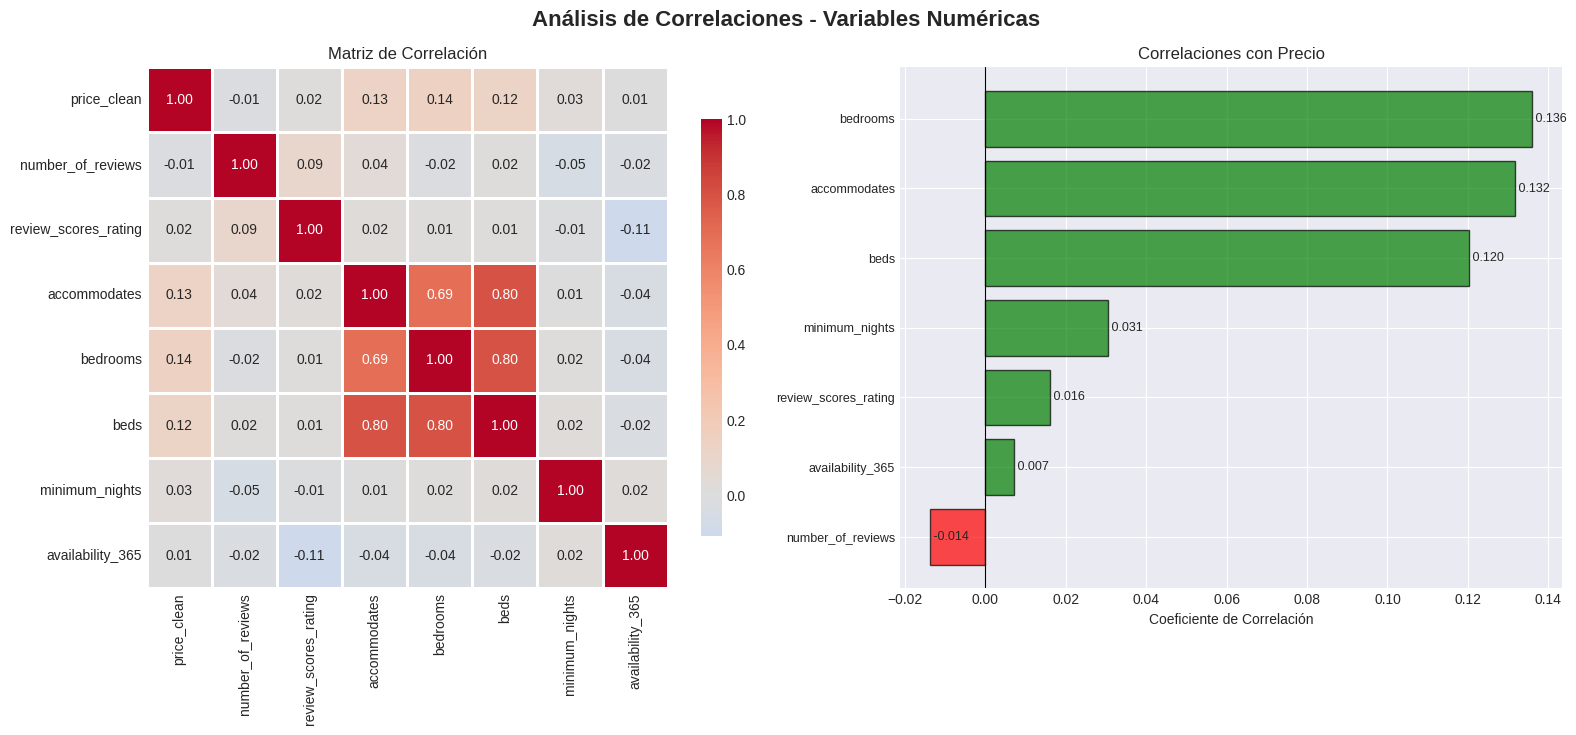


 Variables analizadas: price_clean, number_of_reviews, review_scores_rating, accommodates, bedrooms, beds, minimum_nights, availability_365

 Top Correlaciones con Precio:
  • bedrooms: 0.136 (correlación positiva débil)
  • accommodates: 0.132 (correlación positiva débil)
  • beds: 0.120 (correlación positiva débil)
  • minimum_nights: 0.031 (correlación positiva débil)
  • review_scores_rating: 0.016 (correlación positiva débil)

 Interpretación:


In [ ]:
print("\n" + "=" * 80)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Seleccionar variables numéricas relevantes
numeric_vars = ['price_clean', 'number_of_reviews', 'review_scores_rating',
                'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_365']
available_vars = [var for var in numeric_vars if var in listings.columns]

if len(available_vars) >= 2:
    corr_data = listings[available_vars].dropna()
    corr_matrix = corr_data.corr()

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Análisis de Correlaciones - Variables Numéricas', fontsize=16, fontweight='bold')

    # Mapa de calor
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
    axes[0].set_title('Matriz de Correlación')

    # Top correlaciones con precio
    if 'price_clean' in corr_matrix.columns:
        price_corr = corr_matrix['price_clean'].drop('price_clean').sort_values(ascending=False)
        colors_corr = ['green' if x > 0 else 'red' for x in price_corr.values]
        axes[1].barh(range(len(price_corr)), price_corr.values, color=colors_corr, alpha=0.7, edgecolor='black')
        axes[1].set_yticks(range(len(price_corr)))
        axes[1].set_yticklabels(price_corr.index, fontsize=9)
        axes[1].set_xlabel('Coeficiente de Correlación')
        axes[1].set_title('Correlaciones con Precio')
        axes[1].axvline(0, color='black', linewidth=0.8)
        axes[1].invert_yaxis()

        for i, v in enumerate(price_corr.values):
            axes[1].text(v, i, f' {v:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.savefig('07_correlaciones.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n Variables analizadas: {', '.join(available_vars)}")

    if 'price_clean' in corr_matrix.columns:
        print(f"\n Top Correlaciones con Precio:")
        for var, corr in price_corr.head(5).items():
            direction = "positiva" if corr > 0 else "negativa"
            strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
            print(f"  • {var}: {corr:.3f} (correlación {direction} {strength})")

        print(f"\n Interpretación:")
        if price_corr.iloc[0] > 0.5:
            print(f"  • {price_corr.index[0]} tiene fuerte correlación positiva con precio")
        if any(price_corr < -0.3):
            negative_vars = price_corr[price_corr < -0.3].index.tolist()
            print(f"  • Variables con correlación negativa moderada: {', '.join(negative_vars)}")

9. ANÁLISIS DE HOSTS


 ANÁLISIS DE HOSTS


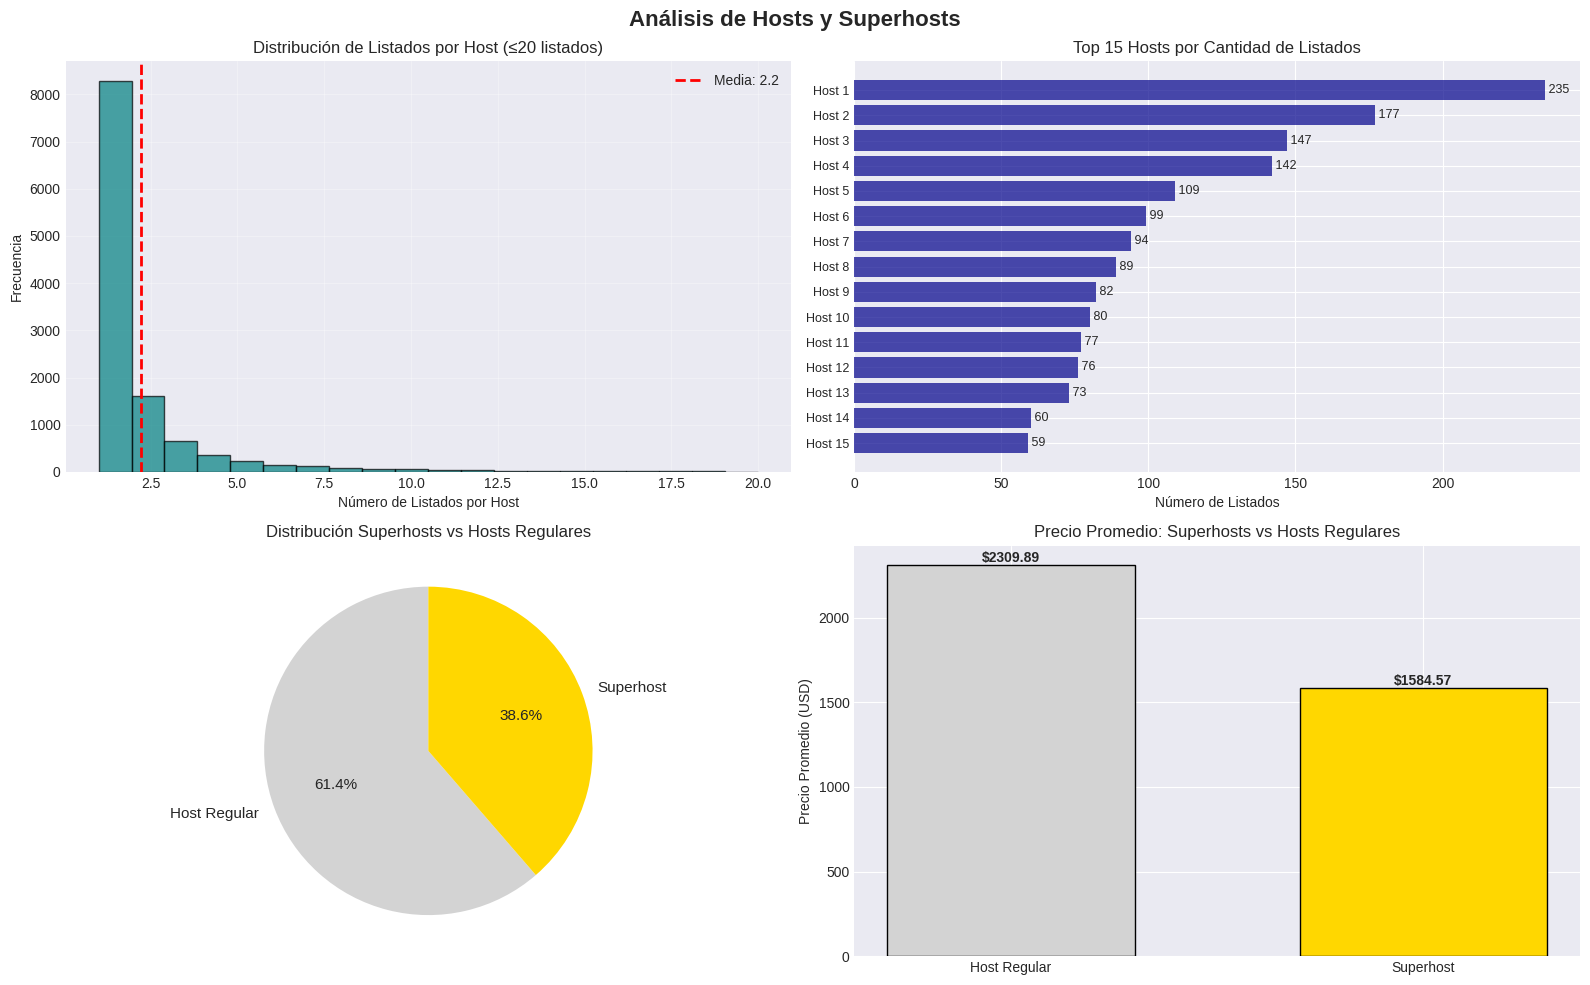


 Estadísticas de Hosts:
  • Total de hosts únicos: 11,897
  • Promedio de listados por host: 2.22
  • Mediana de listados por host: 1
  • Host con más listados: 235 propiedades
  • Hosts con 1 solo listado: 8,287 (69.7%)
  • Hosts con >10 listados: 285 (2.4%)

 Superhosts:
  • Porcentaje de superhosts: 36.7%
  • Diferencia de precio promedio: $725.33 más que hosts regulares


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE HOSTS")
print("=" * 80)

if 'host_id' in listings.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análisis de Hosts y Superhosts', fontsize=16, fontweight='bold')

    # Distribución de listados por host
    listings_per_host = listings.groupby('host_id').size()
    axes[0, 0].hist(listings_per_host[listings_per_host <= 20], bins=20, color='teal', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Número de Listados por Host')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].set_title('Distribución de Listados por Host (≤20 listados)')
    axes[0, 0].axvline(listings_per_host.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Media: {listings_per_host.mean():.1f}')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Top hosts por cantidad de listados
    top_hosts = listings_per_host.sort_values(ascending=False).head(15)
    axes[0, 1].barh(range(len(top_hosts)), top_hosts.values, color='darkblue', alpha=0.7)
    axes[0, 1].set_yticks(range(len(top_hosts)))
    axes[0, 1].set_yticklabels([f'Host {i+1}' for i in range(len(top_hosts))], fontsize=9)
    axes[0, 1].set_xlabel('Número de Listados')
    axes[0, 1].set_title('Top 15 Hosts por Cantidad de Listados')
    axes[0, 1].invert_yaxis()

    for i, v in enumerate(top_hosts.values):
        axes[0, 1].text(v, i, f' {v}', va='center', fontsize=9)

    # Superhosts vs Regulares
    if 'host_is_superhost' in listings.columns:
        superhost_counts = listings['host_is_superhost'].value_counts()
        colors_super = ['gold' if x == 't' else 'lightgray' for x in superhost_counts.index]
        labels_super = ['Superhost' if x == 't' else 'Host Regular' for x in superhost_counts.index]

        axes[1, 0].pie(superhost_counts.values, labels=labels_super, autopct='%1.1f%%',
                       colors=colors_super, startangle=90, textprops={'fontsize': 11})
        axes[1, 0].set_title('Distribución Superhosts vs Hosts Regulares')

        # Comparación de precios: Superhosts vs Regulares
        if 'price_clean' in listings.columns:
            price_by_superhost = listings.groupby('host_is_superhost')['price_clean'].mean()
            labels_price = ['Superhost' if x == 't' else 'Host Regular' for x in price_by_superhost.index]
            colors_price = ['gold' if x == 't' else 'lightgray' for x in price_by_superhost.index]

            axes[1, 1].bar(range(len(price_by_superhost)), price_by_superhost.values,
                          color=colors_price, edgecolor='black', width=0.6)
            axes[1, 1].set_xticks(range(len(price_by_superhost)))
            axes[1, 1].set_xticklabels(labels_price)
            axes[1, 1].set_ylabel('Precio Promedio (USD)')
            axes[1, 1].set_title('Precio Promedio: Superhosts vs Hosts Regulares')

            for i, v in enumerate(price_by_superhost.values):
                axes[1, 1].text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('08_analisis_hosts.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n Estadísticas de Hosts:")
    print(f"  • Total de hosts únicos: {listings['host_id'].nunique():,}")
    print(f"  • Promedio de listados por host: {listings_per_host.mean():.2f}")
    print(f"  • Mediana de listados por host: {listings_per_host.median():.0f}")
    print(f"  • Host con más listados: {top_hosts.iloc[0]} propiedades")
    print(f"  • Hosts con 1 solo listado: {(listings_per_host == 1).sum():,} ({(listings_per_host == 1).sum()/len(listings_per_host)*100:.1f}%)")
    print(f"  • Hosts con >10 listados: {(listings_per_host > 10).sum():,} ({(listings_per_host > 10).sum()/len(listings_per_host)*100:.1f}%)")

    if 'host_is_superhost' in listings.columns:
        superhost_pct = (listings['host_is_superhost'] == 't').sum() / len(listings) * 100
        print(f"\n Superhosts:")
        print(f"  • Porcentaje de superhosts: {superhost_pct:.1f}%")

        if 'price_clean' in listings.columns:
            price_diff = price_by_superhost.iloc[0] - price_by_superhost.iloc[1] if len(price_by_superhost) > 1 else 0
            print(f"  • Diferencia de precio promedio: ${abs(price_diff):.2f} {'más' if price_diff > 0 else 'menos'} que hosts regulares")

10. ANÁLISIS DE CARACTERÍSTICAS DE PROPIEDAD


 ANÁLISIS DE CARACTERÍSTICAS DE PROPIEDAD


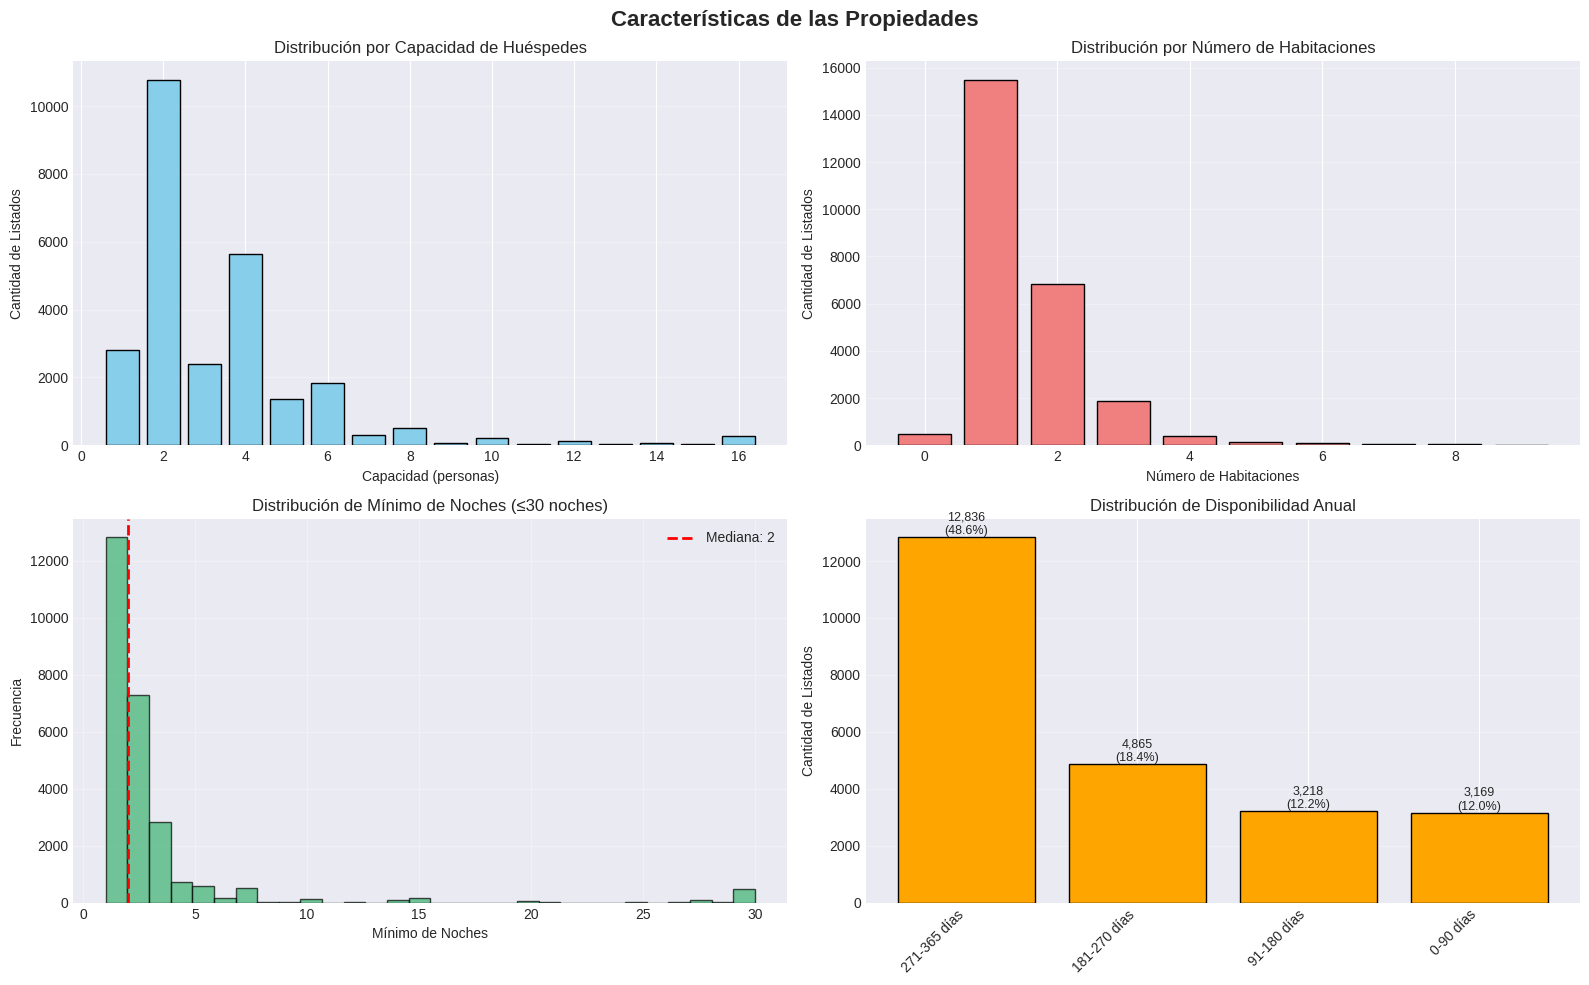


 Estadísticas de Características:

 Capacidad:
  • Promedio: 3.3 personas
  • Más común: 2 personas (10779 listados)

 Habitaciones:
  • Promedio: 1.6 habitaciones
  • Más común: 1.0 habitación(es) (15497 listados)

 Mínimo de Noches:
  • Promedio: 4.8 noches
  • Mediana: 2 noches
  • Listados con mínimo >30 noches: 285

 Disponibilidad Anual:
  • Promedio: 234.6 días/año
  • Listados siempre disponibles (365 días): 1,678
  • Listados nunca disponibles (0 días): 2,313


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS DE CARACTERÍSTICAS DE PROPIEDAD")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Características de las Propiedades', fontsize=16, fontweight='bold')

# Accommodates
if 'accommodates' in listings.columns:
    accom_counts = listings['accommodates'].value_counts().sort_index()
    axes[0, 0].bar(accom_counts.index, accom_counts.values, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Capacidad (personas)')
    axes[0, 0].set_ylabel('Cantidad de Listados')
    axes[0, 0].set_title('Distribución por Capacidad de Huéspedes')
    axes[0, 0].grid(alpha=0.3, axis='y')

# Bedrooms
if 'bedrooms' in listings.columns:
    bed_counts = listings['bedrooms'].value_counts().sort_index().head(10)
    axes[0, 1].bar(bed_counts.index, bed_counts.values, color='lightcoral', edgecolor='black')
    axes[0, 1].set_xlabel('Número de Habitaciones')
    axes[0, 1].set_ylabel('Cantidad de Listados')
    axes[0, 1].set_title('Distribución por Número de Habitaciones')
    axes[0, 1].grid(alpha=0.3, axis='y')

# Minimum nights
if 'minimum_nights' in listings.columns:
    min_nights_filtered = listings[listings['minimum_nights'] <= 30]['minimum_nights']
    axes[1, 0].hist(min_nights_filtered, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Mínimo de Noches')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Mínimo de Noches (≤30 noches)')
    axes[1, 0].axvline(listings['minimum_nights'].median(), color='red', linestyle='--',
                       linewidth=2, label=f'Mediana: {listings["minimum_nights"].median():.0f}')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

# Availability 365
if 'availability_365' in listings.columns:
    avail_ranges = pd.cut(listings['availability_365'], bins=[0, 90, 180, 270, 365],
                          labels=['0-90 días', '91-180 días', '181-270 días', '271-365 días'])
    avail_counts = avail_ranges.value_counts()
    axes[1, 1].bar(range(len(avail_counts)), avail_counts.values, color='orange', edgecolor='black')
    axes[1, 1].set_xticks(range(len(avail_counts)))
    axes[1, 1].set_xticklabels(avail_counts.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Cantidad de Listados')
    axes[1, 1].set_title('Distribución de Disponibilidad Anual')
    axes[1, 1].grid(alpha=0.3, axis='y')

    for i, v in enumerate(avail_counts.values):
        pct = v / len(listings) * 100
        axes[1, 1].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('09_caracteristicas_propiedad.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Estadísticas de Características:")

if 'accommodates' in listings.columns:
    print(f"\n Capacidad:")
    print(f"  • Promedio: {listings['accommodates'].mean():.1f} personas")
    print(f"  • Más común: {listings['accommodates'].mode()[0]} personas ({listings['accommodates'].value_counts().iloc[0]} listados)")

if 'bedrooms' in listings.columns:
    print(f"\n Habitaciones:")
    print(f"  • Promedio: {listings['bedrooms'].mean():.1f} habitaciones")
    print(f"  • Más común: {listings['bedrooms'].mode()[0]} habitación(es) ({listings['bedrooms'].value_counts().iloc[0]} listados)")

if 'minimum_nights' in listings.columns:
    print(f"\n Mínimo de Noches:")
    print(f"  • Promedio: {listings['minimum_nights'].mean():.1f} noches")
    print(f"  • Mediana: {listings['minimum_nights'].median():.0f} noches")
    print(f"  • Listados con mínimo >30 noches: {(listings['minimum_nights'] > 30).sum():,}")

if 'availability_365' in listings.columns:
    print(f"\n Disponibilidad Anual:")
    print(f"  • Promedio: {listings['availability_365'].mean():.1f} días/año")
    print(f"  • Listados siempre disponibles (365 días): {(listings['availability_365'] == 365).sum():,}")
    print(f"  • Listados nunca disponibles (0 días): {(listings['availability_365'] == 0).sum():,}")

11. ANÁLISIS MULTIVARIADO - PRECIO


 ANÁLISIS MULTIVARIADO DE PRECIOS


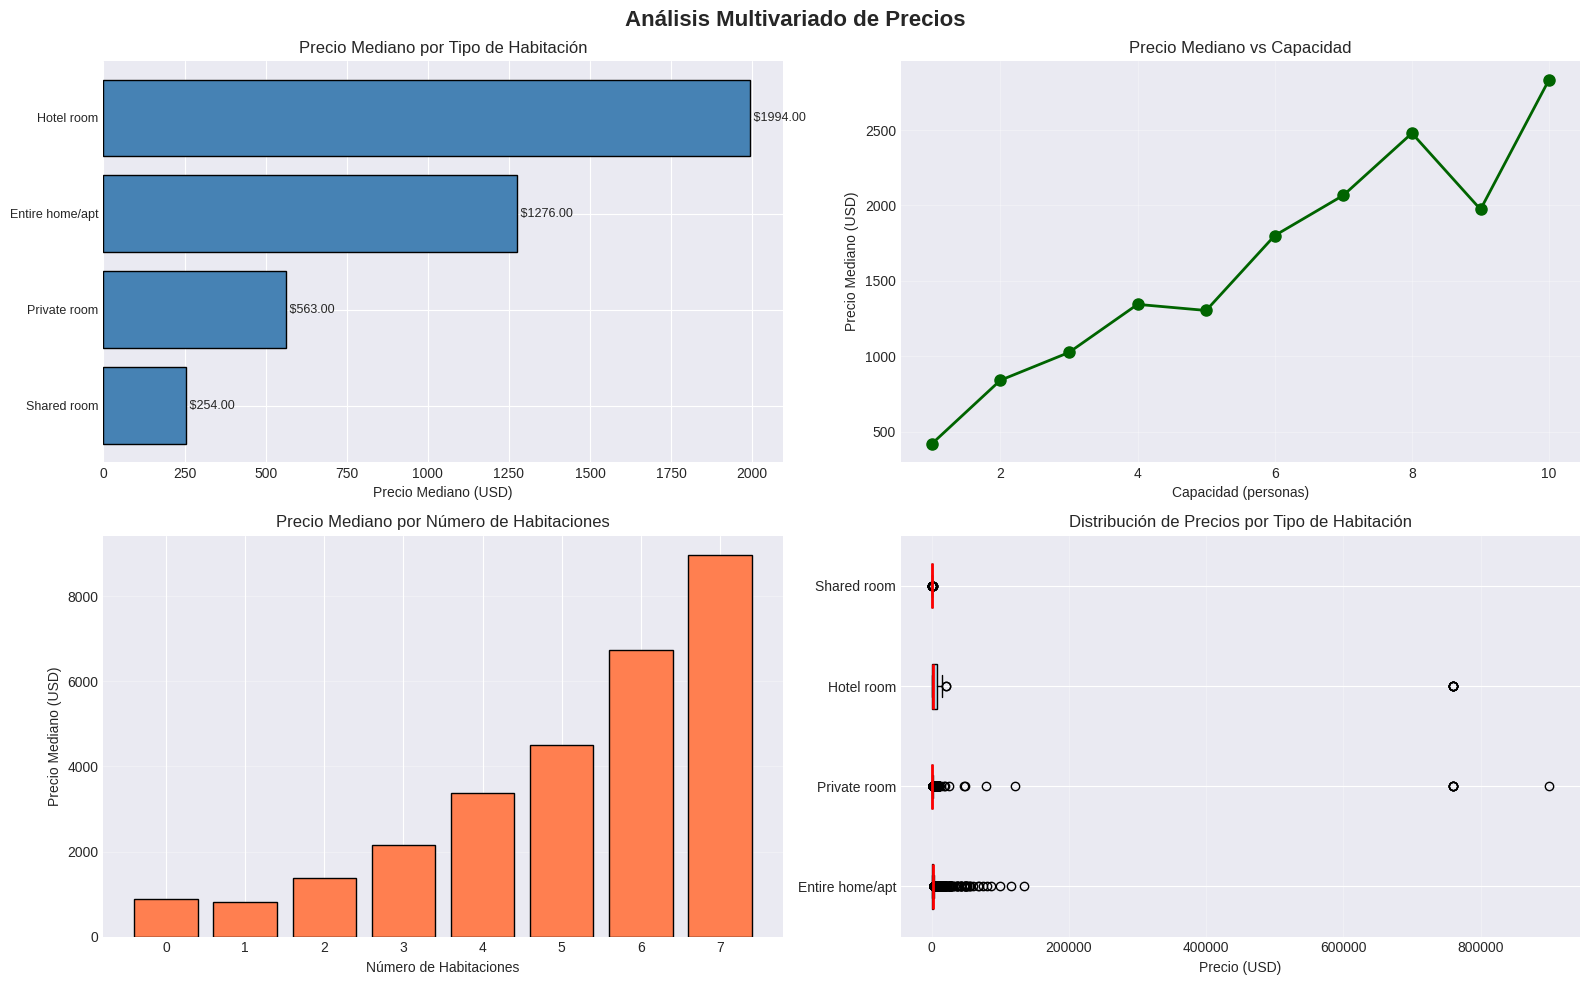


 Insights de Precios:

  Por Tipo de Habitación:
    • Hotel room: $1994.00 mediana (91 listados)
    • Entire home/apt: $1276.00 mediana (17,235 listados)
    • Private room: $563.00 mediana (8,867 listados)
    • Shared room: $254.00 mediana (208 listados)

  Por Capacidad:
    • Incremento promedio por persona: $268.56


In [ ]:
print("\n" + "=" * 80)
print(" ANÁLISIS MULTIVARIADO DE PRECIOS")
print("=" * 80)

if 'price_clean' in listings.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análisis Multivariado de Precios', fontsize=16, fontweight='bold')

    # Precio por tipo de habitación
    if 'room_type' in listings.columns:
        price_by_room = listings.groupby('room_type')['price_clean'].median().sort_values(ascending=False)
        axes[0, 0].barh(range(len(price_by_room)), price_by_room.values, color='steelblue', edgecolor='black')
        axes[0, 0].set_yticks(range(len(price_by_room)))
        axes[0, 0].set_yticklabels(price_by_room.index, fontsize=9)
        axes[0, 0].set_xlabel('Precio Mediano (USD)')
        axes[0, 0].set_title('Precio Mediano por Tipo de Habitación')
        axes[0, 0].invert_yaxis()

        for i, v in enumerate(price_by_room.values):
            axes[0, 0].text(v, i, f' ${v:.2f}', va='center', fontsize=9)

    # Precio por capacidad
    if 'accommodates' in listings.columns:
        price_by_accom = listings.groupby('accommodates')['price_clean'].median().head(10)
        axes[0, 1].plot(price_by_accom.index, price_by_accom.values, marker='o', linewidth=2,
                        markersize=8, color='darkgreen')
        axes[0, 1].set_xlabel('Capacidad (personas)')
        axes[0, 1].set_ylabel('Precio Mediano (USD)')
        axes[0, 1].set_title('Precio Mediano vs Capacidad')
        axes[0, 1].grid(alpha=0.3)

    # Precio por número de habitaciones
    if 'bedrooms' in listings.columns:
        price_by_beds = listings.groupby('bedrooms')['price_clean'].median().head(8)
        axes[1, 0].bar(price_by_beds.index, price_by_beds.values, color='coral', edgecolor='black')
        axes[1, 0].set_xlabel('Número de Habitaciones')
        axes[1, 0].set_ylabel('Precio Mediano (USD)')
        axes[1, 0].set_title('Precio Mediano por Número de Habitaciones')
        axes[1, 0].grid(alpha=0.3, axis='y')

    # Boxplot: Precio por tipo de habitación
    if 'room_type' in listings.columns:
        room_types = listings['room_type'].unique()[:4]
        price_data = [listings[listings['room_type'] == rt]['price_clean'].dropna() for rt in room_types]

        bp = axes[1, 1].boxplot(price_data, labels=room_types, patch_artist=True, vert=False,
                                medianprops=dict(color='red', linewidth=2))

        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')

        axes[1, 1].set_xlabel('Precio (USD)')
        axes[1, 1].set_title('Distribución de Precios por Tipo de Habitación')
        axes[1, 1].grid(alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig('10_analisis_precios_multivariado.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n Insights de Precios:")

    if 'room_type' in listings.columns:
        print(f"\n  Por Tipo de Habitación:")
        for room, price in price_by_room.items():
            count = (listings['room_type'] == room).sum()
            print(f"    • {room}: ${price:.2f} mediana ({count:,} listados)")

    if 'accommodates' in listings.columns:
        print(f"\n  Por Capacidad:")
        print(f"    • Incremento promedio por persona: ${(price_by_accom.iloc[-1] - price_by_accom.iloc[0]) / (len(price_by_accom)-1):.2f}")


12. RESUMEN EJECUTIVO FINAL

In [ ]:
print("\n" + "=" * 80)
print(" RESUMEN EJECUTIVO - HALLAZGOS CLAVE")
print("=" * 80)

# Calcular métricas de manera segura
precio_prom = listings['price_clean'].mean() if 'price_clean' in listings.columns else 0
precio_med = listings['price_clean'].median() if 'price_clean' in listings.columns else 0
precio_min = listings['price_clean'].min() if 'price_clean' in listings.columns else 0
precio_max = listings['price_clean'].max() if 'price_clean' in listings.columns else 0
num_hosts = listings['host_id'].nunique() if 'host_id' in listings.columns else 0
rating_prom = listings['review_scores_rating'].mean() if 'review_scores_rating' in listings.columns else 0
reviews_prom = listings['number_of_reviews'].mean() if 'number_of_reviews' in listings.columns else 0
capacidad_prom = listings['accommodates'].mean() if 'accommodates' in listings.columns else 0
disponibilidad_prom = listings['availability_365'].mean() if 'availability_365' in listings.columns else 0

# Tipo más común de propiedad
tipo_comun = listings['property_type'].value_counts().index[0] if 'property_type' in listings.columns else 'N/A'
habitacion_comun = listings['room_type'].value_counts().index[0] if 'room_type' in listings.columns else 'N/A'

# Superhosts
pct_superhosts = ((listings['host_is_superhost'] == 't').sum() / len(listings) * 100) if 'host_is_superhost' in listings.columns else 0

# Disponibilidad calendar
pct_disponibilidad = ((calendar['available'] == 't').sum() / len(calendar) * 100) if 'available' in calendar.columns else 0

# Fechas de reviews
fecha_min = reviews['date'].min().strftime('%Y-%m-%d') if 'date' in reviews.columns else 'N/A'
fecha_max = reviews['date'].max().strftime('%Y-%m-%d') if 'date' in reviews.columns else 'N/A'

print(f"""


 DATOS GENERALES:
  • Total de listados analizados: {len(listings):,}
  • Periodo de análisis: {fecha_min} a {fecha_max}
  • Total de reviews: {len(reviews):,}

 PRECIOS:
  • Precio promedio: ${precio_prom:.2f} USD
  • Precio mediano: ${precio_med:.2f} USD
  • Rango: ${precio_min:.2f} - ${precio_max:.2f} USD

 PROPIEDADES:
  • Tipo más común: {tipo_comun}
  • Habitación más común: {habitacion_comun}
  • Capacidad promedio: {capacidad_prom:.1f} personas

 HOSTS:
  • Total de hosts: {num_hosts:,}
  • Superhosts: {pct_superhosts:.1f}%

 REVIEWS:
  • Rating promedio: {rating_prom:.2f}/100
  • Promedio de reviews por listado: {reviews_prom:.1f}

 DISPONIBILIDAD:
  • Tasa de disponibilidad general: {pct_disponibilidad:.1f}%
  • Disponibilidad promedio anual: {disponibilidad_prom:.0f} días

════════════════════════════════════════════════════════════════════════════════

 RECOMENDACIONES ESTRATÉGICAS:

1. CALIDAD DE DATOS:
   ✓ Implementar proceso de limpieza para valores nulos en campos críticos
   ✓ Validar consistencia entre datasets (listings, calendar, reviews)
   ✓ Estandarizar formatos de precio y fecha

2. OPORTUNIDADES DE MERCADO:
   ✓ Identificar vecindarios con alta demanda y baja oferta
   ✓ Analizar gaps de precio entre superhosts y hosts regulares
   ✓ Explorar nichos desatendidos (ej: propiedades para grupos grandes)

3. OPTIMIZACIÓN DE PRECIOS:
   ✓ Implementar pricing dinámico basado en estacionalidad
   ✓ Ajustar precios según día de la semana y eventos locales
   ✓ Considerar correlación entre características y precio óptimo

4. MEJORA DE OCUPACIÓN:
   ✓ Identificar listados con baja disponibilidad para estrategias específicas
   ✓ Analizar patrones temporales para promociones dirigidas
   ✓ Optimizar mínimo de noches según tipo de propiedad

5. ANÁLISIS ADICIONALES SUGERIDOS:
   ✓ Sentiment analysis en reviews para identificar áreas de mejora
   ✓ Clustering de propiedades similares para benchmarking
   ✓ Análisis de competencia por vecindario
   ✓ Predicción de precios con machine learning


""")

print(" ANÁLISIS COMPLETADO EXITOSAMENTE")


📋 RESUMEN EJECUTIVO - HALLAZGOS CLAVE



 DATOS GENERALES:
  • Total de listados analizados: 26,401
  • Periodo de análisis: 2011-04-02 a 2025-07-01
  • Total de reviews: 1,388,226
  
 PRECIOS:
  • Precio promedio: $1989.29 USD
  • Precio mediano: $1039.00 USD
  • Rango: $66.00 - $900000.00 USD
  
 PROPIEDADES:
  • Tipo más común: Entire rental unit
  • Habitación más común: Entire home/apt
  • Capacidad promedio: 3.3 personas
  
 HOSTS:
  • Total de hosts: 11,897
  • Superhosts: 36.7%
  
 REVIEWS:
  • Rating promedio: 4.75/100
  • Promedio de reviews por listado: 52.6
  
 DISPONIBILIDAD:
  • Tasa de disponibilidad general: 64.3%
  • Disponibilidad promedio anual: 235 días

════════════════════════════════════════════════════════════════════════════════

 RECOMENDACIONES ESTRATÉGICAS:

1. CALIDAD DE DATOS:
   ✓ Implementar proceso de limpieza para valores nulos en campos críticos
   ✓ Validar consistencia entre datasets (listings, calendar, reviews)
   ✓ Estandarizar formatos de preci